#Preprocessing and Splitting the dataset into Training and Development Datasets

In [ ]:
# 1、 Import Libraries  导入相关库
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# 2、 读取csv文件，输出信息
df = pd.read_csv('Combined Data.csv')
print(df)


       Unnamed: 0                                          statement   status
0               0                                         oh my gosh  Anxiety
1               1  trouble sleeping, confused mind, restless hear...  Anxiety
2               2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3               3  I've shifted my focus to something else but I'...  Anxiety
4               4  I'm restless and restless, it's been a month n...  Anxiety
...           ...                                                ...      ...
53038       53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039       53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040       53040  Is there any way to sleep better? I can't slee...  Anxiety
53041       53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042       53042  I have really bad door anxiety! It's not about...  Anxiety

[53043 rows x 3 columns]


In [4]:
# Encoding Labels  标签化处理
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])

In [5]:
import re

def preprocess(sentence):
    # Convert to string and lowercase
    sentence = str(sentence).lower()

    # Remove hashtags
    sentence = re.sub(r'#\S+', '', sentence)

    # Remove mentions
    sentence = re.sub(r'@\S+', '', sentence)

    # Remove punctuation and numbers
    sentence = re.sub(r'[^\w\s]', '', sentence)  # Keeps alphanumeric characters and whitespace
    sentence = re.sub(r'\d+', '', sentence)      # Removes numbers

    # Normalize whitespace
    sentence = ' '.join(sentence.split())

    # Remove URLs
    sentence = re.sub(r'http\S+', '', sentence)

    return sentence



In [6]:
# Apply preprocessing to the text data
df['statement'] = df['statement'].map(lambda s: preprocess(s))

In [7]:
# Shuffle the data and split it into 70% training and 30% development
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffling the da

In [8]:
# Split into training (70%) and development (30%)
train_df, dev_df = train_test_split(df, test_size=0.3, random_state=42)


In [9]:
# Save the training and development datasets into separate CSV files
train_df.to_csv('train_data.csv', index=False)
dev_df.to_csv('dev_data.csv', index=False)

#TRAINING

In [10]:
df_train = pd.read_csv('train_data.csv')
print(df_train)

       Unnamed: 0                                          statement  status
0           19896  i feel like postpartum depression will be life...       2
1           52363  blonde highlights hello first time posting her...       0
2           44352            doe not know how he got home last night       3
3           44772                         beeen awake for awile sick       3
4           29495  he came home from who knows where and he walks...       5
...           ...                                                ...     ...
37125       27104            why do not people take me seriously why       6
37126       36863                   he is a son of one of my friends       3
37127       49364  diarrhea from stress what can i do hey guys i ...       5
37128       18606  i have always felt alone my whole life for as ...       6
37129       37793  is there any way to bring my appetite back due...       2

[37130 rows x 3 columns]


In [11]:
print(df.columns)

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')


In [12]:
df_train=df_train[['statement', 'status']]


In [13]:
df_train.status.unique()

array([2, 0, 3, 5, 1, 4, 6], dtype=int64)

In [14]:
df_train=df_train.sample(frac=1)
df_train.head(5)

,statement,status
20243,liberalnomo thirtyonemks nowthisnews so what a...,2
20078,i am scared of myself lol no joke not even bei...,2
31295,the memories i suppressed for so long suddenly...,2
21515,ineededthat allthemoreammothatwillhelpmekillmy...,2
12714,both excited and discouraged to go back to the...,2


In [15]:
df_train = df_train[['statement', 'status']]

In [16]:

df_train.status.value_counts()

3    11447
2    10745
6     7534
0     2728
1     2015
5     1831
4      830
Name: status, dtype: int64

In [18]:
!pip install simpletransformers
!pip install transformers

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


ERROR: No .egg-info directory found in C:\Users\TEMP.DESKTOP-7IA63T0.057\AppData\Local\Temp\pip-pip-egg-info-9bz5k5dk


  Using cached transformers-4.46.0-py3-none-any.whl.metadata (44 kB)
   ---------------------------------------- 10.0/10.0 MB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 2.4/2.4 MB 5.9 MB/s eta 0:00:00


In [17]:
# pip install --upgrade simpletransformers


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3225604259.py, line 1)

In [17]:
import pandas as pd
from simpletransformers.classification import ClassificationModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

np.set_printoptions(threshold=np.inf)

ModuleNotFoundError: No module named 'simpletransformers'

#MODEL: BERT

In [20]:
from simpletransformers.classification import ClassificationModel

model = ClassificationModel(
    'bert', 'bert-base-uncased',  # Change the pre-trained model to BERT
    num_labels=7,                 # Binary classification task
    use_cuda=False,               # Disable GPU if needed
    args={
        "reprocess_input_data": True,          # Reprocess the input data
        "use_cached_eval_features": False,     # Don't use cached eval features
        "overwrite_output_dir": True,          # Overwrite the output directory
        "num_train_epochs": 1                  # Train for 1 epoch
    }
)

ModuleNotFoundError: No module named 'simpletransformers'

In [ ]:
# model.train_model(df_train)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/37130 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/4642 [00:00<?, ?it/s]

#MODEL: DISTILBERT


In [18]:
model1=ClassificationModel('distilbert','distilbert-base-cased',num_labels=7,use_cuda=True,args={
        "reprocess_input_data" : True,
        "use_cached_eval_features":False,
        "overwrite_output_dir": True,
        "num_train_epochs": 1}
)

NameError: name 'ClassificationModel' is not defined

In [30]:
model1.train_model(df_train)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/74 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 1:   0%|          | 0/4642 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


(4642, 0.6466329642176268)

#MODEL: MBERT

In [ ]:
# model2=ClassificationModel('bert','bert-base-multilingual-cased',num_labels=2,use_cuda=True,args={
#         "reprocess_input_data" : True,
#         "use_cached_eval_features":False,
#         "overwrite_output_dir": True,
#         "num_train_epochs": 5}
# )

In [ ]:
# model2.train_model(df_train)

#MODEL: ROBERTA

In [ ]:
# model3 = ClassificationModel(
#     "roberta",
#     "roberta-base",
#     num_labels=2,
#     weight=[0,1],
#     use_cuda=True,
#     args={
#         "reprocess_input_data" : True,
#         "use_cached_eval_features":False,
#         "overwrite_output_dir": True,
#         "num_train_epochs": 3 })

In [ ]:
# model3.train_model(df_train)

#MODEL: LaBSE

In [ ]:
# model4=ClassificationModel('bert','setu4993/LaBSE',num_labels=2,use_cuda=False,
#         args={
#         "reprocess_input_data" : True,
#         "use_cached_eval_features":False,
#         "overwrite_output_dir": True,
#         "num_train_epochs": 1
#         })

In [ ]:
# model4.train_model(df_train)

In [ ]:
#  predictions, raw_outputs = model.predict(df_test['statement'].tolist())

#DEVELOPMENT


In [18]:
df_test = pd.read_csv('dev_data.csv')
print(df_test)

       Unnamed: 0                                          statement  status
0           26991    head over rails is it a foolproof method trains       6
1           30151  he said you better get a job by friday or the ...       3
2           19666  i am stuck in an unproductive loop there were ...       2
3           13781  i have a small penis no friends my gf cheated ...       2
4           28772  it does eventually pass once i realise they ar...       3
...           ...                                                ...     ...
15908       43602  quot bruce springsteen embarks on world tour q...       3
15909       35823  severe hypochondria after being on accutane he...       0
15910       39305  hi first post here so sorry if i m doing anyth...       2
15911       48594  move and still healing podcasts to listen to f...       5
15912        1827  did tika succeed not being tempted by po in th...       3

[15913 rows x 3 columns]


In [19]:
df_test.status.unique()

array([6, 3, 2, 1, 0, 5, 4])

In [21]:
df_test=df_test.sample(frac=1)
df_test.head(5)

,Unnamed: 0,statement,status
15846,35839,nausea so recently my fear of throwing up has ...,0
3223,16168,hope i die goodbye world just took sleeping pills,6
5996,51920,away from home im away from home on a college ...,0
1770,8131,i am lonely i made that very clear to her an a...,2
4774,45519,trouble breathing i have bipolar ii and its go...,1


In [33]:
print(df_test['statement'].head())
print(df_test['statement'].isnull().sum())


15846    nausea so recently my fear of throwing up has ...
3223     hope i die goodbye world just took sleeping pills
5996     away from home im away from home on a college ...
1770     i am lonely i made that very clear to her an a...
4774     trouble breathing i have bipolar ii and its go...
Name: statement, dtype: object


In [37]:

# Ensure 'statement' column is filled and of string type
df_test['statement'] = df_test['statement'].fillna("")  # Handle NaN values

# Convert to list for prediction
statements = df_test['statement'].tolist()

# Ensure the list is not empty
if len(statements) == 0:
    print("The test dataset is empty!")
else:
    # Predict using the model
    predictions1, raw_outputs1 = model1.predict(statements)
    print(predictions1)  # Display predictions


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:2188: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


[0 6 0 2 1 6 2 2 2 3 3 6 3 2 2 1 3 3 2 1 2 2 2 6 3 6 3 3 1 3 6 6 6 2 6 2 2
 6 6 2 3 3 6 3 6 3 2 3 3 2 3 2 3 6 0 1 2 3 4 2 6 6 2 5 4 0 3 3 6 5 2 5 2 2
 6 3 3 2 6 3 1 0 4 5 2 3 3 3 2 2 5 0 6 2 6 2 6 2 3 1 2 6 3 3 6 4 3 2 2 2 0
 0 0 6 6 6 2 2 4 0 2 6 3 2 2 3 5 2 3 3 2 0 3 3 0 6 3 6 0 5 1 2 5 3 6 2 2 6
 2 3 6 2 2 0 2 2 6 2 3 2 2 6 3 3 0 2 2 6 3 6 2 6 6 2 3 3 6 1 3 6 6 2 3 0 3
 0 3 3 3 3 6 3 6 6 3 6 2 3 3 6 0 6 2 3 2 2 2 3 3 0 3 2 6 3 3 2 5 3 3 3 2 1
 3 2 3 6 2 5 2 6 2 6 6 1 1 6 6 6 3 2 3 2 3 5 6 3 2 0 3 1 3 3 0 1 3 2 3 2 5
 5 1 6 6 0 2 1 6 6 6 2 3 3 6 0 0 6 2 3 3 2 3 3 2 3 6 3 6 2 6 3 4 6 6 3 2 6
 6 1 6 2 6 2 3 3 2 2 6 3 3 3 2 5 2 3 6 6 5 2 3 3 2 6 6 1 2 2 3 6 6 3 1 3 6
 2 6 2 3 6 2 3 3 6 5 2 3 2 3 3 3 2 1 2 3 2 0 3 6 3 2 3 3 3 5 4 2 3 6 1 2 3
 6 6 2 6 3 3 0 3 0 3 2 6 2 1 2 3 2 3 2 3 2 3 6 6 2 3 3 2 1 6 6 5 3 6 2 5 2
 2 3 3 6 2 5 6 0 3 6 0 0 2 0 3 6 2 0 3 3 6 6 3 1 2 3 1 6 3 0 2 2 2 2 3 6 0
 6 1 1 6 6 2 2 3 3 2 1 2 1 0 2 4 0 6 6 5 1 6 2 3 0 6 0 2 4 0 2 2 6 2 3 0 2
 0 2 4 6 3 2 3 5 3 2 2 3 

In [38]:

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore',category=FutureWarning)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [41]:
print(classification_report(df_test.status,predictions1))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1160
           1       0.81      0.76      0.78       862
           2       0.76      0.76      0.76      4659
           3       0.92      0.94      0.93      4904
           4       0.78      0.53      0.63       371
           5       0.67      0.65      0.66       838
           6       0.70      0.72      0.71      3119

    accuracy                           0.80     15913
   macro avg       0.78      0.74      0.76     15913
weighted avg       0.80      0.80      0.80     15913



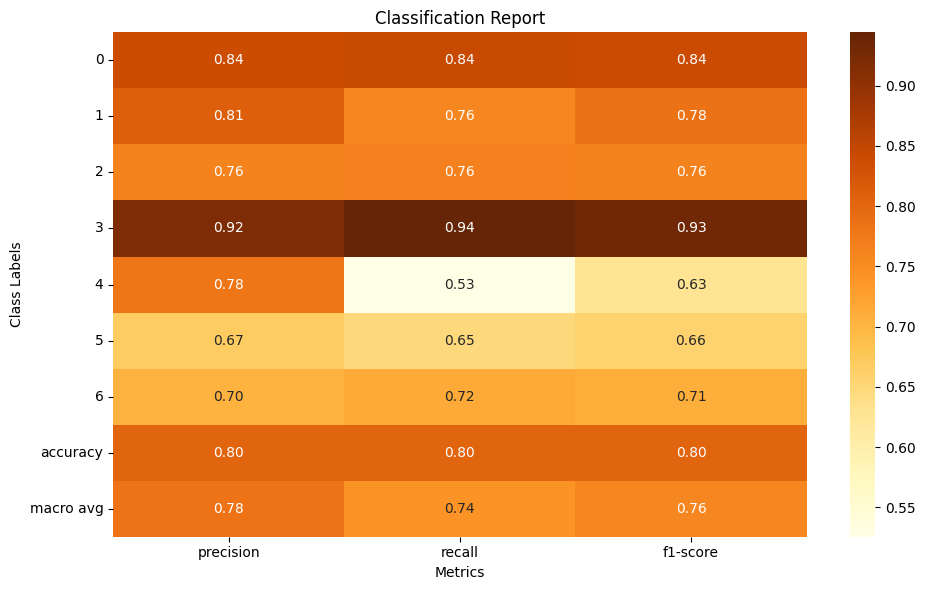

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


report = classification_report(df_test.status, predictions1, output_dict=True)

# Convert the report dictionary to a DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Plot the precision, recall, and F1-score as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlOrBr', fmt='.2f', cbar=True)

# Customize the plot if needed
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class Labels')
plt.tight_layout()
plt.show()

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [49]:
cm1 = confusion_matrix(df_test.status,predictions1)

In [50]:
cm1

array([[ 978,   41,   43,   35,   10,   49,    4],
       [  34,  654,   89,   36,   11,   33,    5],
       [  41,   46, 3562,   79,   11,   52,  868],
       [  36,   14,   69, 4631,   10,   97,   47],
       [  22,   25,   42,   54,  195,   29,    4],
       [  51,   22,   66,  132,   13,  542,   12],
       [   5,    4,  796,   74,    0,    9, 2231]])

#TESTING

In [65]:
# Define your test sentences as separate variables
test_sentence1 = "I'm feeling very anxious today."
test_sentence2 = "Despite the chaos around me, I feel at peace."
test_sentence3 = "I can't help but feel overwhelmed by the weight of my responsibilities."
test_sentence4 = "Today is a beautiful day, and I'm grateful for everything."
test_sentence5 = "I'm excited about the future, but I worry about what could go wrong."
test_sentence6 = "I often feel like I'm in a dark place and can't find a way out."
test_sentence7 = "I just got a promotion at work, and I'm really proud of myself!"
test_sentence8 = "I feel numb and detached from everything around me."
test_sentence9 = "Even though I'm busy, I enjoy the little things in life."
test_sentence10 = "Sometimes I feel like my anxiety is crippling, but I try to push through."


In [68]:

# Preprocess the input sentence
preprocessed_sentence1 = preprocess(test_sentence1)
preprocessed_sentence2 = preprocess(test_sentence2)
preprocessed_sentence3 = preprocess(test_sentence3)
preprocessed_sentence4 = preprocess(test_sentence4)
preprocessed_sentence5 = preprocess(test_sentence5)
preprocessed_sentence6 = preprocess(test_sentence6)
preprocessed_sentence7 = preprocess(test_sentence7)
preprocessed_sentence8 = preprocess(test_sentence8)
preprocessed_sentence9 = preprocess(test_sentence9)
preprocessed_sentence10 = preprocess(test_sentence10)


In [70]:

# Make the prediction
predicted_label1, raw_outputs1 = model1.predict([preprocessed_sentence1])  # Wrap the input in a list
predicted_label2, raw_outputs2 = model1.predict([preprocessed_sentence2])  # Wrap the input in a list
predicted_label3, raw_outputs3 = model1.predict([preprocessed_sentence3])
predicted_label4, raw_outputs4 = model1.predict([preprocessed_sentence4])
predicted_label5, raw_outputs5 = model1.predict([preprocessed_sentence5])
predicted_label6, raw_outputs6 = model1.predict([preprocessed_sentence6])
predicted_label7, raw_outputs7 = model1.predict([preprocessed_sentence7])
predicted_label8, raw_outputs8 = model1.predict([preprocessed_sentence8])
predicted_label9, raw_outputs9 = model1.predict([preprocessed_sentence9])
predicted_label10, raw_outputs10 = model1.predict([preprocessed_sentence10])




0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [71]:

# Print the input sentences and their predicted labels
print("Input Sentence 1:", test_sentence1)
print("Predicted Numeric Label 1:", predicted_label1)

print("Input Sentence 2:", test_sentence2)
print("Predicted Numeric Label 2:", predicted_label2)

print("Input Sentence 3:", test_sentence3)
print("Predicted Numeric Label 3:", predicted_label3)

print("Input Sentence 4:", test_sentence4)
print("Predicted Numeric Label 4:", predicted_label4)

print("Input Sentence 5:", test_sentence5)
print("Predicted Numeric Label 5:", predicted_label5)

print("Input Sentence 6:", test_sentence6)
print("Predicted Numeric Label 6:", predicted_label6)

print("Input Sentence 7:", test_sentence7)
print("Predicted Numeric Label 7:", predicted_label7)

print("Input Sentence 8:", test_sentence8)
print("Predicted Numeric Label 8:", predicted_label8)

print("Input Sentence 9:", test_sentence9)
print("Predicted Numeric Label 9:", predicted_label9)

print("Input Sentence 10:", test_sentence10)
print("Predicted Numeric Label 10:", predicted_label10)

Input Sentence 1: I'm feeling very anxious today.
Predicted Numeric Label 1: [0]
Input Sentence 2: Despite the chaos around me, I feel at peace.
Predicted Numeric Label 2: [2]
Input Sentence 3: I can't help but feel overwhelmed by the weight of my responsibilities.
Predicted Numeric Label 3: [3]
Input Sentence 4: Today is a beautiful day, and I'm grateful for everything.
Predicted Numeric Label 4: [3]
Input Sentence 5: I'm excited about the future, but I worry about what could go wrong.
Predicted Numeric Label 5: [0]
Input Sentence 6: I often feel like I'm in a dark place and can't find a way out.
Predicted Numeric Label 6: [3]
Input Sentence 7: I just got a promotion at work, and I'm really proud of myself!
Predicted Numeric Label 7: [3]
Input Sentence 8: I feel numb and detached from everything around me.
Predicted Numeric Label 8: [2]
Input Sentence 9: Even though I'm busy, I enjoy the little things in life.
Predicted Numeric Label 9: [3]
Input Sentence 10: Sometimes I feel like my 

In [72]:
# Step 5: Convert predicted labels back to original status for each prediction
original_label1 = le.inverse_transform(predicted_label1)
original_label2 = le.inverse_transform(predicted_label2)
original_label3 = le.inverse_transform(predicted_label3)
original_label4 = le.inverse_transform(predicted_label4)
original_label5 = le.inverse_transform(predicted_label5)
original_label6 = le.inverse_transform(predicted_label6)
original_label7 = le.inverse_transform(predicted_label7)
original_label8 = le.inverse_transform(predicted_label8)
original_label9 = le.inverse_transform(predicted_label9)
original_label10 = le.inverse_transform(predicted_label10)

# Print the original labels along with raw outputs for each sentence
print("Input Sentence 1:", test_sentence1)
print("Predicted Numeric Label 1:", predicted_label1)
print("Original Predicted Label 1:", original_label1[0])  # Display the original status label
print("Raw Outputs 1:", raw_outputs1)  # Display raw outputs (if needed)

print("Input Sentence 2:", test_sentence2)
print("Predicted Numeric Label 2:", predicted_label2)
print("Original Predicted Label 2:", original_label2[0])  # Display the original status label
print("Raw Outputs 2:", raw_outputs2)  # Display raw outputs (if needed)

print("Input Sentence 3:", test_sentence3)
print("Predicted Numeric Label 3:", predicted_label3)
print("Original Predicted Label 3:", original_label3[0])  # Display the original status label
print("Raw Outputs 3:", raw_outputs3)  # Display raw outputs (if needed)

print("Input Sentence 4:", test_sentence4)
print("Predicted Numeric Label 4:", predicted_label4)
print("Original Predicted Label 4:", original_label4[0])  # Display the original status label
print("Raw Outputs 4:", raw_outputs4)  # Display raw outputs (if needed)

print("Input Sentence 5:", test_sentence5)
print("Predicted Numeric Label 5:", predicted_label5)
print("Original Predicted Label 5:", original_label5[0])  # Display the original status label
print("Raw Outputs 5:", raw_outputs5)  # Display raw outputs (if needed)

print("Input Sentence 6:", test_sentence6)
print("Predicted Numeric Label 6:", predicted_label6)
print("Original Predicted Label 6:", original_label6[0])  # Display the original status label
print("Raw Outputs 6:", raw_outputs6)  # Display raw outputs (if needed)

print("Input Sentence 7:", test_sentence7)
print("Predicted Numeric Label 7:", predicted_label7)
print("Original Predicted Label 7:", original_label7[0])  # Display the original status label
print("Raw Outputs 7:", raw_outputs7)  # Display raw outputs (if needed)

print("Input Sentence 8:", test_sentence8)
print("Predicted Numeric Label 8:", predicted_label8)
print("Original Predicted Label 8:", original_label8[0])  # Display the original status label
print("Raw Outputs 8:", raw_outputs8)  # Display raw outputs (if needed)

print("Input Sentence 9:", test_sentence9)
print("Predicted Numeric Label 9:", predicted_label9)
print("Original Predicted Label 9:", original_label9[0])  # Display the original status label
print("Raw Outputs 9:", raw_outputs9)  # Display raw outputs (if needed)

print("Input Sentence 10:", test_sentence10)
print("Predicted Numeric Label 10:", predicted_label10)
print("Original Predicted Label 10:", original_label10[0])  # Display the original status label
print("Raw Outputs 10:", raw_outputs10)  # Display raw outputs (if needed)


Input Sentence 1: I'm feeling very anxious today.
Predicted Numeric Label 1: [0]
Original Predicted Label 1: Anxiety
Raw Outputs 1: [[ 5.33203125 -1.06445312 -0.66992188  0.15844727 -1.91113281  0.42724609
  -2.26757812]]
Input Sentence 2: Despite the chaos around me, I feel at peace.
Predicted Numeric Label 2: [2]
Original Predicted Label 2: Depression
Raw Outputs 2: [[-1.44433594 -1.99902344  1.92382812  1.49121094 -2.27539062 -0.85302734
   0.91748047]]
Input Sentence 3: I can't help but feel overwhelmed by the weight of my responsibilities.
Predicted Numeric Label 3: [3]
Original Predicted Label 3: Normal
Raw Outputs 3: [[-1.02050781 -1.59472656 -0.50292969  2.86523438 -1.94628906  2.24804688
  -1.62109375]]
Input Sentence 4: Today is a beautiful day, and I'm grateful for everything.
Predicted Numeric Label 4: [3]
Original Predicted Label 4: Normal
Raw Outputs 4: [[-1.01367188 -1.50097656  0.41333008  5.09765625 -1.93261719 -1.40136719
  -0.37109375]]
Input Sentence 5: I'm excited 

#OTHER MODELS

# XLM Roberta

In [ ]:
# model5 = ClassificationModel(
#     "xlmroberta",
#     "xlm-roberta-base",
#     num_labels=4,
#     weight=[0,1,2,3],
#     use_cuda=True,
#     args={
#         "reprocess_input_data" : True,
#         "use_cached_eval_features":False,
#         "overwrite_output_dir": True,
#         "num_train_epochs": 3 })

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out

In [ ]:
# model5.train_model(df1_train)

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/30 [00:00<?, ?it/s]

(90, 0.915756274263064)

In [ ]:
# predictions5, raw_outputs5 = model5.predict(df_test['Text'].tolist())

  0%|          | 0/560 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

In [ ]:
# print(classification_report(df_test.Label,predictions5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        28
           2       0.12      0.70      0.20        40
           3       0.91      0.63      0.74       476

    accuracy                           0.58       560
   macro avg       0.26      0.33      0.24       560
weighted avg       0.79      0.58      0.65       560



# INDIC BERT

In [ ]:
# model6 = ClassificationModel("albert","ai4bharat/indic-bert",num_labels=4,use_cuda=True,args={
#         "reprocess_input_data" : True,
#         "use_cached_eval_features":False,
#         "overwrite_output_dir": True,
#         "num_train_epochs": 5})

Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertForSequenceClassification: ['sop_classifier.classifier.bias', 'predictions.decoder.bias', 'predictions.bias', 'predictions.LayerNorm.bias', 'predictions.LayerNorm.weight', 'sop_classifier.classifier.weight', 'predictions.decoder.weight', 'predictions.dense.bias', 'predictions.dense.weight']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indi

In [ ]:
# model6.train_model(df1_train)

  0%|          | 0/240 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/30 [00:00<?, ?it/s]

(150, 1.3256050618489583)

In [ ]:
# predictions6, raw_outputs6 = model6.predict(df_test['Text'].tolist())

  0%|          | 0/560 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

In [ ]:
# print(classification_report(df_test.Label,predictions6))

              precision    recall  f1-score   support

           0       0.04      0.50      0.08        16
           1       0.12      0.18      0.14        28
           2       0.13      0.50      0.21        40
           3       0.93      0.34      0.50       476

    accuracy                           0.35       560
   macro avg       0.31      0.38      0.23       560
weighted avg       0.81      0.35      0.45       560



# Muril

In [ ]:
# model7 = ClassificationModel("bert","google/muril-base-cased" ,num_labels=4,use_cuda=True,args={
#         "reprocess_input_data" : True,
#         "use_cached_eval_features":False,
#         "overwrite_output_dir": True,
#         "num_train_epochs": 5})

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not in

In [ ]:
# model7.train_model(df1_train)

  0%|          | 0/240 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/30 [00:00<?, ?it/s]

(150, 0.8961649576822917)

In [ ]:
# predictions7, raw_outputs7 = model7.predict(df_test['Text'].tolist())

  0%|          | 0/560 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

In [ ]:
# print(classification_report(df_test.Label,predictions7))

              precision    recall  f1-score   support

           0       0.07      0.75      0.13        16
           1       0.16      0.61      0.25        28
           2       0.27      0.70      0.39        40
           3       0.97      0.37      0.54       476

    accuracy                           0.42       560
   macro avg       0.37      0.61      0.33       560
weighted avg       0.86      0.42      0.50       560

